In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [134]:
data = pd.read_csv("asthma_disease_data.csv")
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [135]:
data.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'PollutionExposure', 'PollenExposure', 'DustExposure', 'PetAllergy',
       'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever',
       'GastroesophagealReflux', 'LungFunctionFEV1', 'LungFunctionFVC',
       'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing',
       'NighttimeSymptoms', 'ExerciseInduced', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [136]:
data.drop(columns=['PatientID', 'DoctorInCharge'], inplace=True)

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2392 non-null   int64  
 1   Gender                  2392 non-null   int64  
 2   Ethnicity               2392 non-null   int64  
 3   EducationLevel          2392 non-null   int64  
 4   BMI                     2392 non-null   float64
 5   Smoking                 2392 non-null   int64  
 6   PhysicalActivity        2392 non-null   float64
 7   DietQuality             2392 non-null   float64
 8   SleepQuality            2392 non-null   float64
 9   PollutionExposure       2392 non-null   float64
 10  PollenExposure          2392 non-null   float64
 11  DustExposure            2392 non-null   float64
 12  PetAllergy              2392 non-null   int64  
 13  FamilyHistoryAsthma     2392 non-null   int64  
 14  HistoryOfAllergies      2392 non-null   

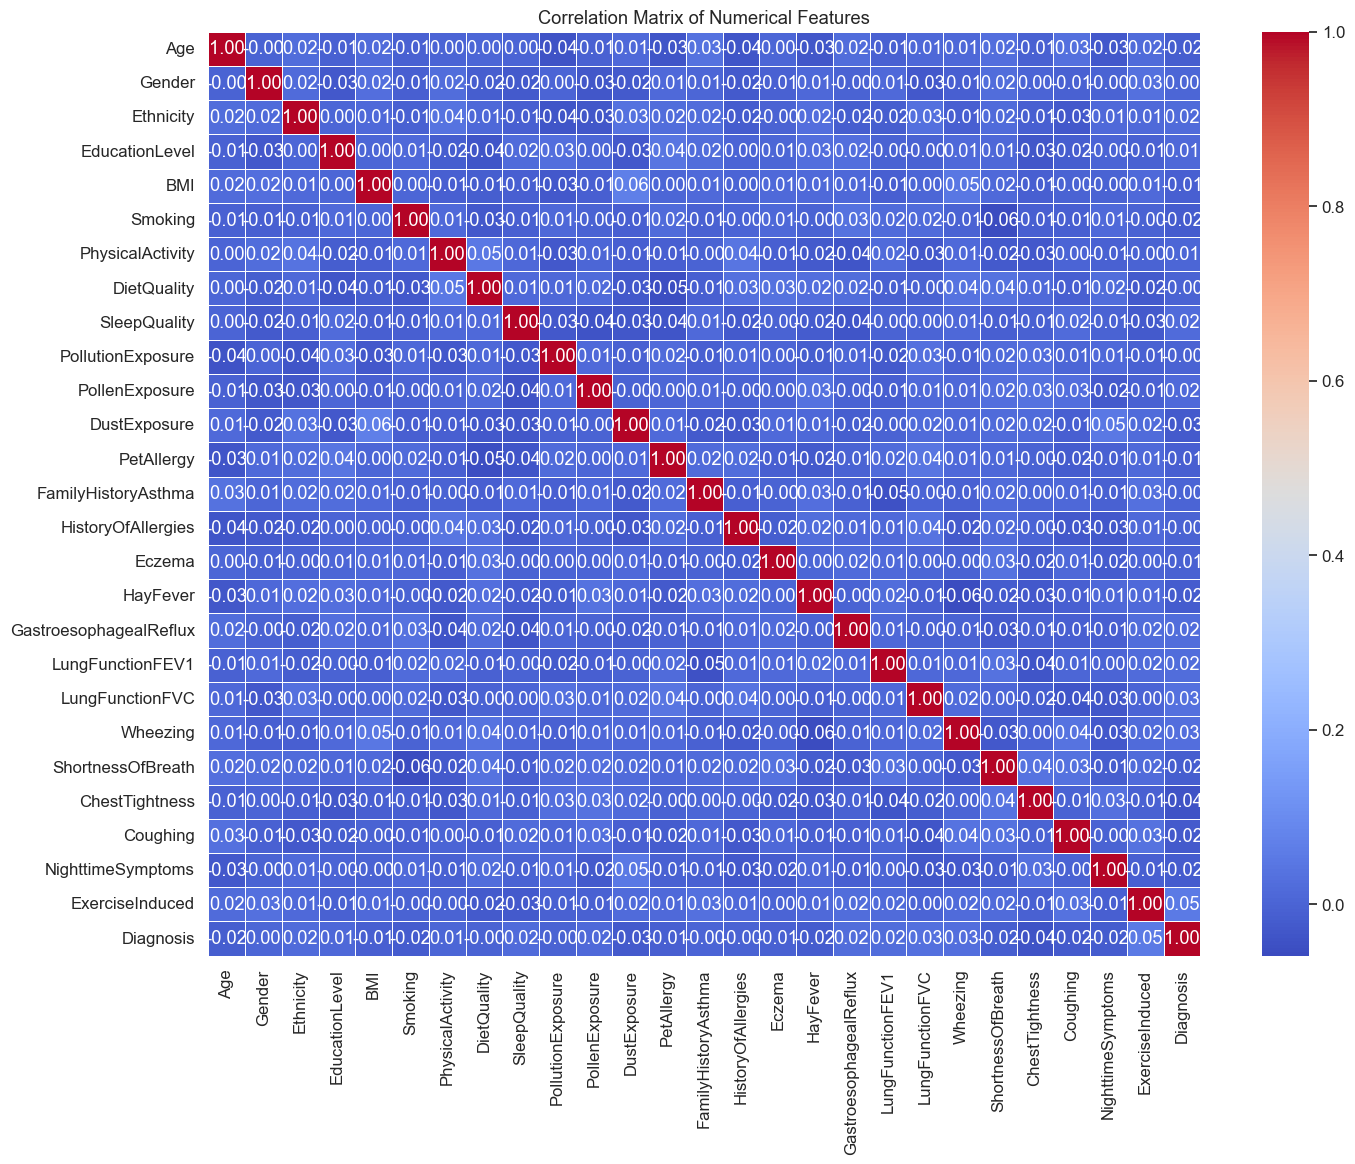

In [138]:

# Select only numerical columns for correlation
numerical_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [139]:
data.Diagnosis.value_counts()

Diagnosis
0    2268
1     124
Name: count, dtype: int64

In [140]:
data_diagnosed = data[data['Diagnosis'] == 1]
data_diagnosed.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
2152,31,1,0,0,15.962873,0,8.164127,0.032833,5.065319,2.095087,...,0,1.289722,1.856247,0,0,1,0,1,1,1
2153,45,1,0,0,18.836049,0,4.429940,0.438220,4.431921,8.840350,...,0,1.439283,3.185382,1,1,1,0,1,1,1
2154,69,1,0,2,18.094707,0,5.648944,4.736220,8.946940,3.825080,...,1,2.076774,1.993044,0,1,1,0,1,0,1
2160,49,1,1,0,17.310073,0,6.746501,8.885441,6.077918,9.210345,...,0,2.328614,5.757570,1,1,0,0,0,1,1
2161,60,1,0,2,32.713025,0,0.416681,9.026695,4.751102,3.140352,...,1,3.419582,2.621883,1,1,1,1,0,0,1


In [141]:
data_not_diagnosed = data[data['Diagnosis'] == 0]
data_not_diagnosed.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,0,1.369051,4.941206,0,0,1,0,0,1,0
1,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,0,2.197767,1.702393,1,0,0,1,1,1,0
2,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,...,0,1.698011,5.022553,1,1,1,0,1,1,0
3,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,...,0,3.032037,2.300159,1,0,1,1,1,0,0
4,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,...,0,3.470589,3.067944,1,1,1,0,0,1,0


/var/folders/0z/nh4zphkd0ljgxbl85xr8nlp00000gn/T/ipykernel_38053/2662957300.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['Female', 'Male'])


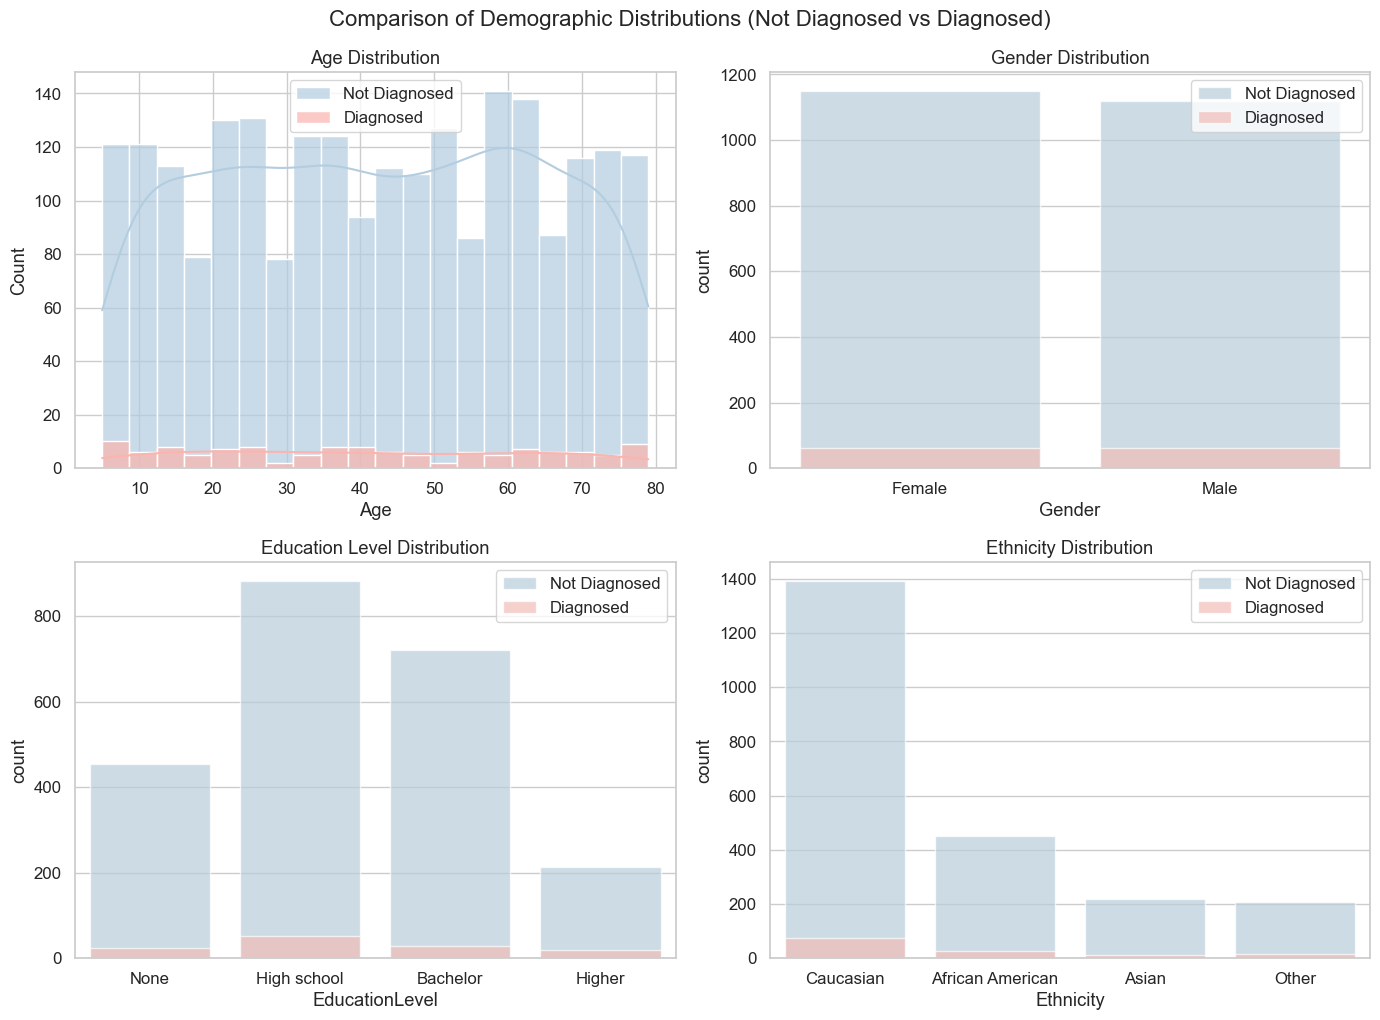

In [142]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
colors = ['#b3cde0', '#fbb4ae']  # Light blue for all, light red for diagnosed

# Age distribution (histogram)
sns.histplot(data_not_diagnosed['Age'], bins=20, kde=True, ax=axes[0, 0], color=colors[0], label='Not Diagnosed', alpha=0.7)
sns.histplot(data_diagnosed['Age'], bins=20, kde=True, ax=axes[0, 0], color=colors[1], label='Diagnosed', alpha=0.7)
axes[0, 0].set_title('Age Distribution')
axes[0, 0].legend()

# Gender distribution (countplot)
sns.countplot(x='Gender', data=data_not_diagnosed, ax=axes[0, 1], color=colors[0], label='Not Diagnosed', alpha=0.7)
sns.countplot(x='Gender', data=data_diagnosed, ax=axes[0, 1], color=colors[1], label='Diagnosed', alpha=0.7)
axes[0, 1].set_title('Gender Distribution')
axes[0, 1].set_xticklabels(['Female', 'Male'])
axes[0, 1].legend()

# Education Level distribution (countplot)
sns.countplot(x='EducationLevel', data=data_not_diagnosed, ax=axes[1, 0], color=colors[0], label='Not Diagnosed', alpha=0.7)
sns.countplot(x='EducationLevel', data=data_diagnosed, ax=axes[1, 0], color=colors[1], label='Diagnosed', alpha=0.7)
axes[1, 0].set_title('Education Level Distribution')
axes[1, 0].set_xticks([0, 1, 2, 3])
axes[1, 0].set_xticklabels(['None', 'High school', 'Bachelor', 'Higher'])
axes[1, 0].legend()

# Ethnicity distribution (countplot)
sns.countplot(x='Ethnicity', data=data_not_diagnosed, ax=axes[1, 1], color=colors[0], label='Not Diagnosed', alpha=0.7)
sns.countplot(x='Ethnicity', data=data_diagnosed, ax=axes[1, 1], color=colors[1], label='Diagnosed', alpha=0.7)
axes[1, 1].set_title('Ethnicity Distribution')
axes[1, 1].set_xticks([0, 1, 2, 3])
axes[1, 1].set_xticklabels(['Caucasian', 'African American', 'Asian', 'Other'])
axes[1, 1].legend()

plt.tight_layout()
plt.suptitle('Comparison of Demographic Distributions (Not Diagnosed vs Diagnosed)', fontsize=16, y=1.02)
plt.show()


/var/folders/0z/nh4zphkd0ljgxbl85xr8nlp00000gn/T/ipykernel_38053/2657593230.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['Female', 'Male'])


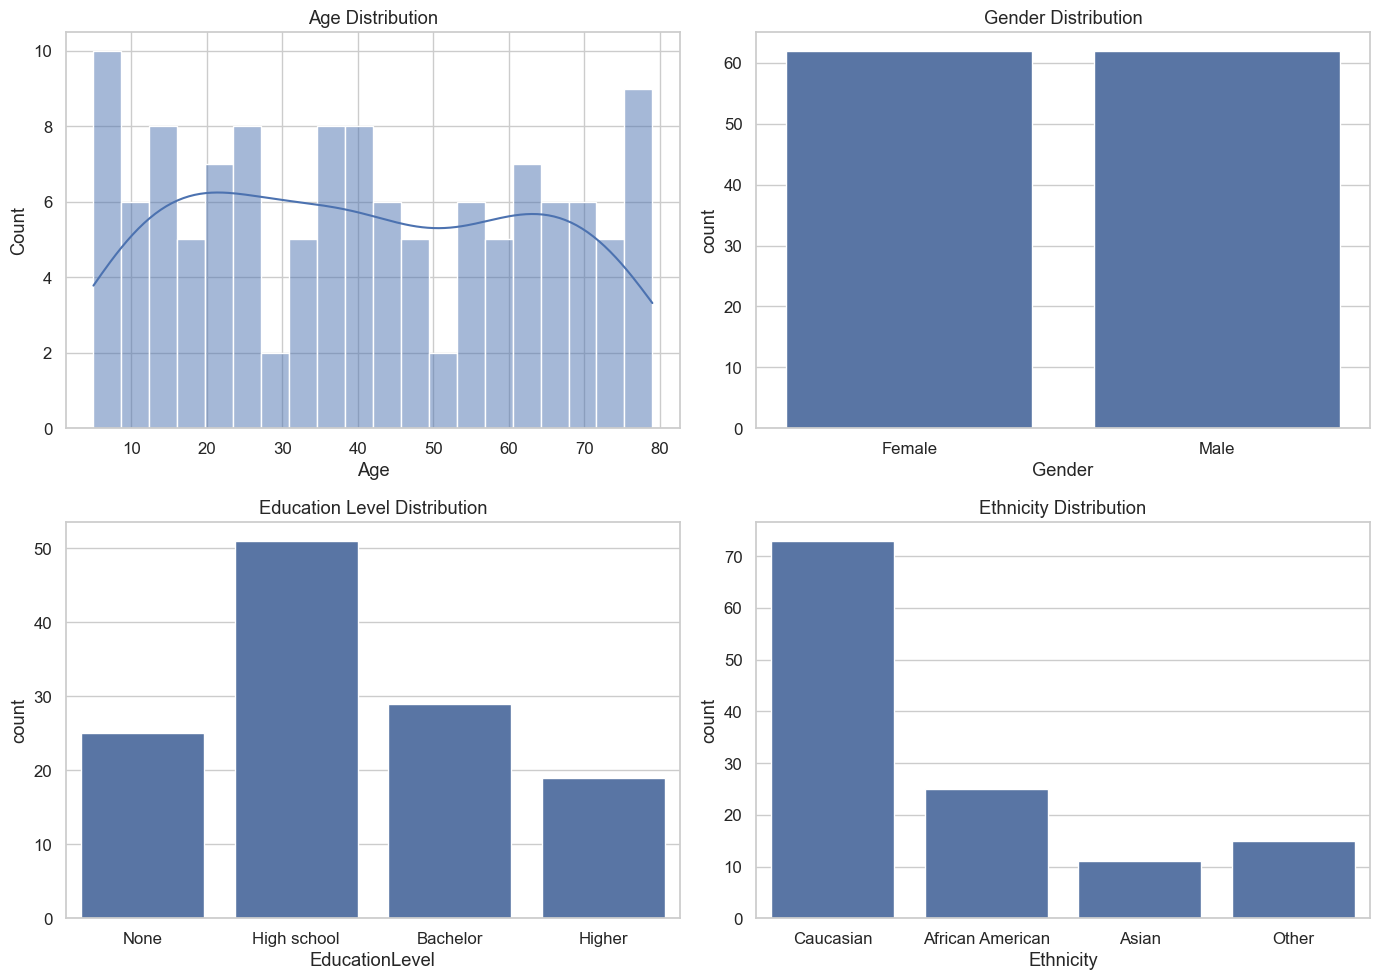

In [143]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age distribution
sns.histplot(data_diagnosed['Age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Gender distribution
sns.countplot(x='Gender', data=data_diagnosed, ax=axes[0, 1])
axes[0, 1].set_title('Gender Distribution')
axes[0, 1].set_xticklabels(['Female', 'Male'])

# EducationLevel distribution
sns.countplot(x='EducationLevel', data=data_diagnosed, ax=axes[1, 0])
axes[1, 0].set_title('Education Level Distribution')
axes[1, 0].set_xticks([0, 1, 2, 3])
axes[1, 0].set_xticklabels(['None', 'High school', 'Bachelor', 'Higher'])

# Ethnicity distribution
sns.countplot(x='Ethnicity', data=data_diagnosed, ax=axes[1, 1])
axes[1, 1].set_title('Ethnicity Distribution')
axes[1, 1].set_xticks([0, 1, 2, 3])
axes[1, 1].set_xticklabels(['Caucasian', 'African American', 'Asian', 'Other'])

plt.tight_layout()
plt.show()

Percentage of Diagnosis by Age Category:
               No Asthma (0)  Asthma (1)
Age_Category                           
0                 93.798450    6.201550
1                 94.230769    5.769231
2                 94.938918    5.061082
3                 95.017794    4.982206 

Percentage of Diagnosis by Gender:
         No Asthma (0)  Asthma (1)
Gender                           
0           94.884488    5.115512
1           94.745763    5.254237 

Percentage of Diagnosis by Education Level:
                 No Asthma (0)  Asthma (1)
EducationLevel                           
0                   94.769874    5.230126
1                   94.533762    5.466238
2                   96.128171    3.871829
3                   91.810345    8.189655 

Percentage of Diagnosis by Ethnicity:
            No Asthma (0)  Asthma (1)
Ethnicity                           
0              95.017065    4.982935
1              94.736842    5.263158
2              95.196507    4.803493
3              93.2

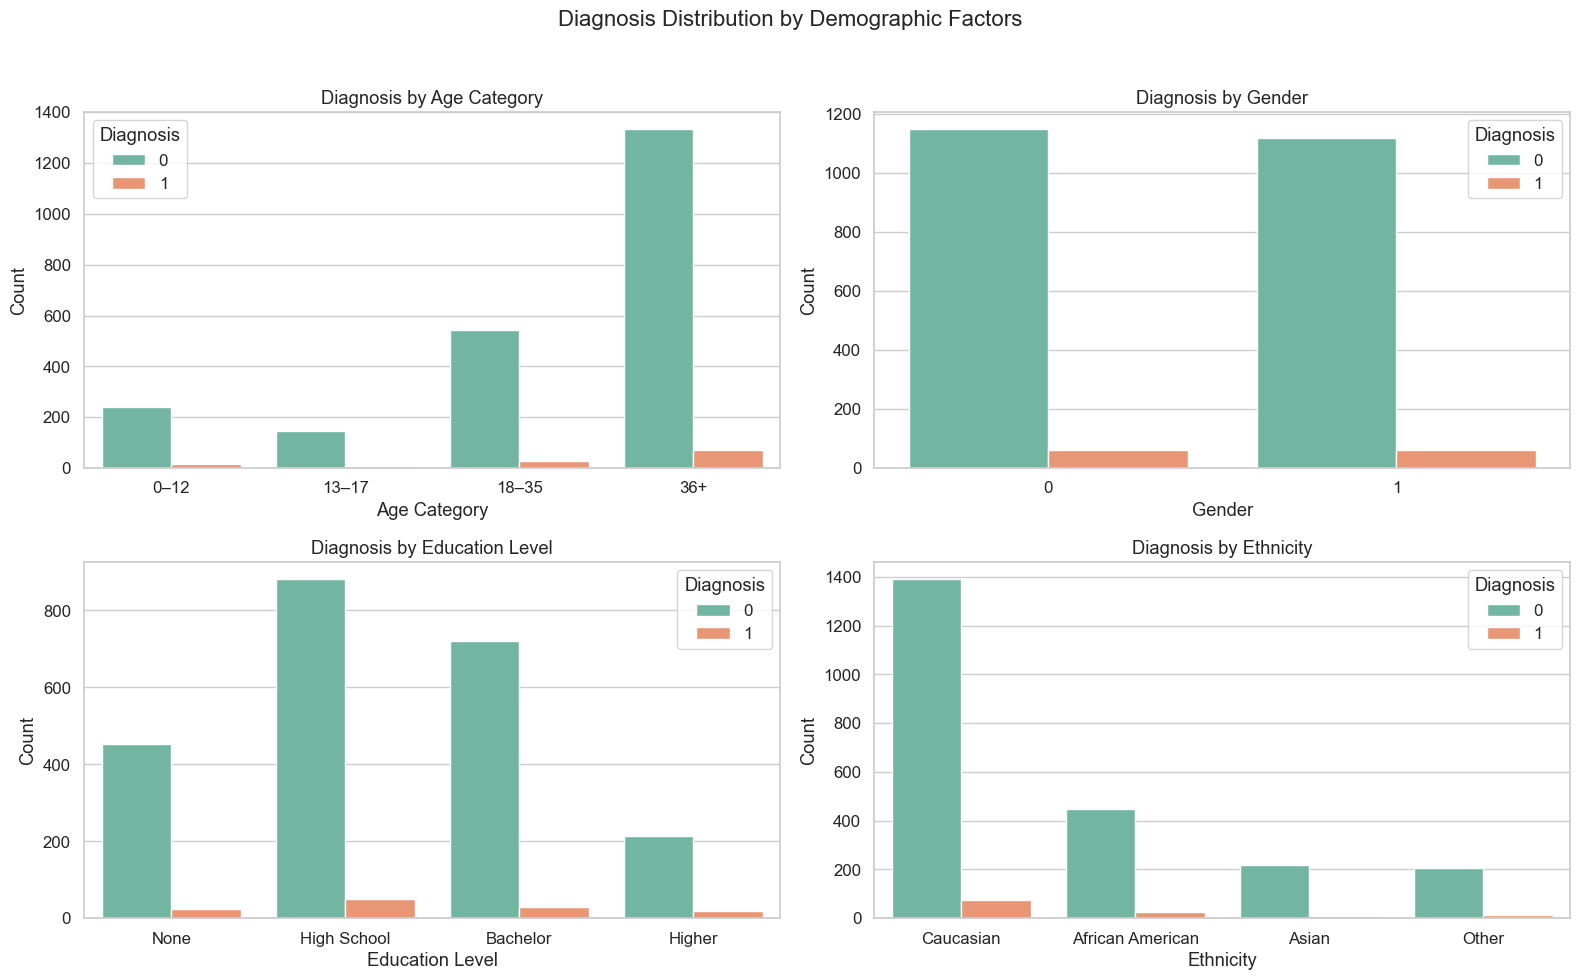

In [144]:
# -----------------------------
# Define Age Category
def categorize_age(age):
    if age <= 12:
        return 0
    elif age <= 17:
        return 1
    elif age <= 35:
        return 2
    else:
        return 3

data['Age_Category'] = data['Age'].apply(categorize_age)

# -----------------------------
# 1. PERCENTAGE TABLES
# -----------------------------
# Age Category
agecat_pct = pd.crosstab(data['Age_Category'], data['Diagnosis'], normalize='index') * 100
agecat_pct.columns = ['No Asthma (0)', 'Asthma (1)']
print("Percentage of Diagnosis by Age Category:\n", agecat_pct, '\n')

# Gender
gender_pct = pd.crosstab(data['Gender'], data['Diagnosis'], normalize='index') * 100
gender_pct.columns = ['No Asthma (0)', 'Asthma (1)']
print("Percentage of Diagnosis by Gender:\n", gender_pct, '\n')

# Education
edu_pct = pd.crosstab(data['EducationLevel'], data['Diagnosis'], normalize='index') * 100
edu_pct.columns = ['No Asthma (0)', 'Asthma (1)']
print("Percentage of Diagnosis by Education Level:\n", edu_pct, '\n')

# Ethnicity
eth_pct = pd.crosstab(data['Ethnicity'], data['Diagnosis'], normalize='index') * 100
eth_pct.columns = ['No Asthma (0)', 'Asthma (1)']
print("Percentage of Diagnosis by Ethnicity:\n", eth_pct, '\n')

# -----------------------------
# 2. COUNTPLOTS IN GROUPED SUBPLOTS
# -----------------------------
plt.figure(figsize=(16, 10))

# Age Category Plot
plt.subplot(2, 2, 1)
sns.countplot(x='Age_Category', hue='Diagnosis', data=data, palette='Set2')
plt.title('Diagnosis by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3], ['0–12', '13–17', '18–35', '36+'])

# Gender Plot
plt.subplot(2, 2, 2)
sns.countplot(x='Gender', hue='Diagnosis', data=data, palette='Set2')
plt.title('Diagnosis by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Education Plot
plt.subplot(2, 2, 3)
sns.countplot(x='EducationLevel', hue='Diagnosis', data=data, palette='Set2')
plt.title('Diagnosis by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3], ['None', 'High School', 'Bachelor', 'Higher'])

# Ethnicity Plot
plt.subplot(2, 2, 4)
sns.countplot(x='Ethnicity', hue='Diagnosis', data=data, palette='Set2')
plt.title('Diagnosis by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3], ['Caucasian', 'African American', 'Asian', 'Other'])

plt.suptitle('Diagnosis Distribution by Demographic Factors', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


/var/folders/0z/nh4zphkd0ljgxbl85xr8nlp00000gn/T/ipykernel_38053/1605604469.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Diagnosis', y=col, data=data, palette='Set2', inner='box', linewidth=1)
/var/folders/0z/nh4zphkd0ljgxbl85xr8nlp00000gn/T/ipykernel_38053/1605604469.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Diagnosis', y=col, data=data, palette='Set2', inner='box', linewidth=1)
/var/folders/0z/nh4zphkd0ljgxbl85xr8nlp00000gn/T/ipykernel_38053/1605604469.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x

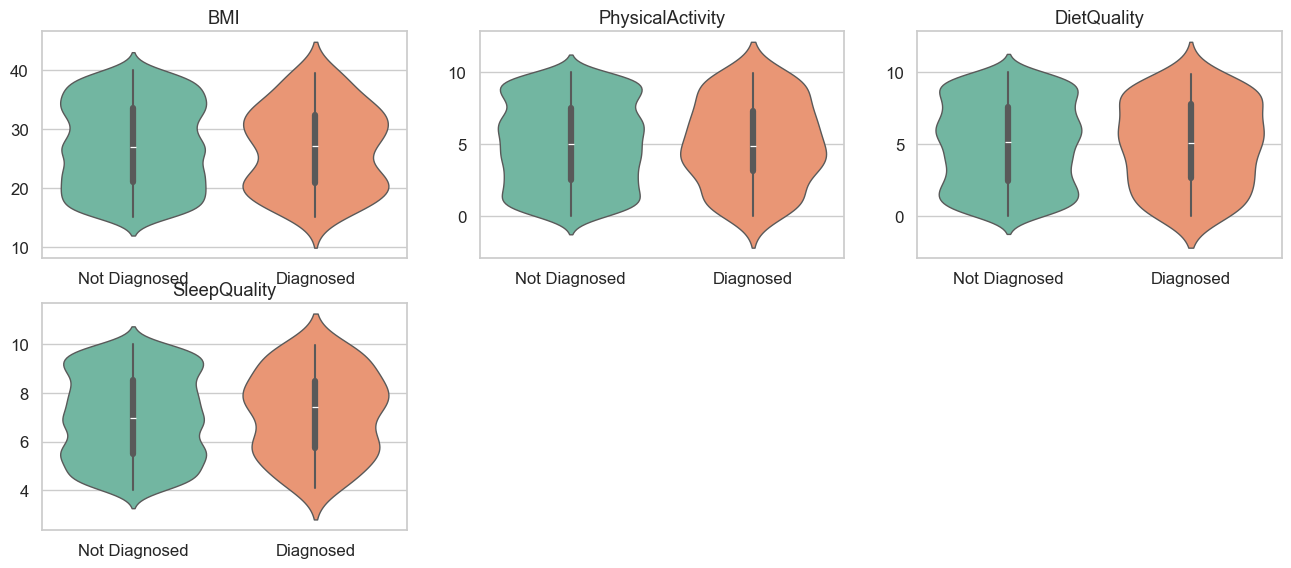

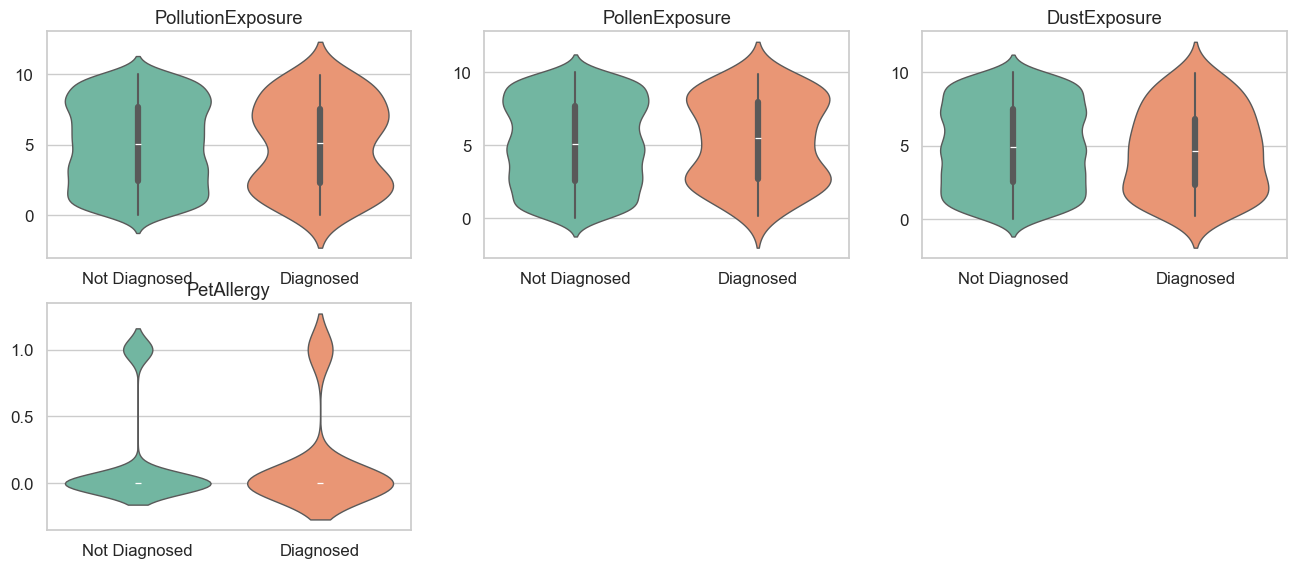

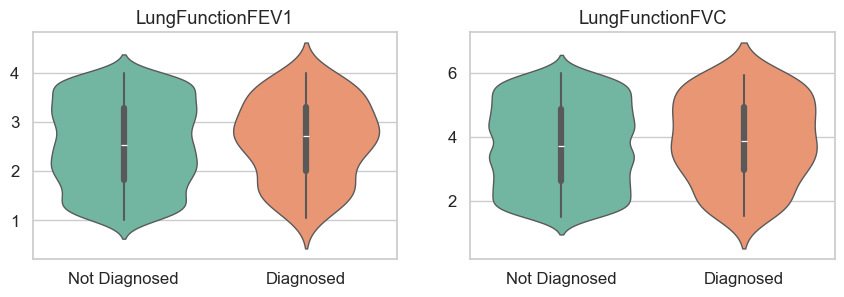

In [145]:
# -----------------------------
# Define the feature groups
lifestyle_cols = ['BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality']
environment_cols = ['PollutionExposure', 'PollenExposure', 'DustExposure', 'PetAllergy']
measurement_cols = ['LungFunctionFEV1', 'LungFunctionFVC']

# Plot settings
plt.figure(figsize=(16, 10))
for idx, col in enumerate(lifestyle_cols):
    plt.subplot(3, 3, idx + 1)
    sns.violinplot(x='Diagnosis', y=col, data=data, palette='Set2', inner='box', linewidth=1)
    plt.title(col)
    plt.xlabel('')  # To save space
    plt.ylabel('')
    plt.xticks([0, 1], ['Not Diagnosed', 'Diagnosed'])

# Plot settings
plt.figure(figsize=(16, 10))
for idx, col in enumerate(environment_cols):
    plt.subplot(3, 3, idx + 1)
    sns.violinplot(x='Diagnosis', y=col, data=data, palette='Set2', inner='box', linewidth=1)
    plt.title(col)
    plt.xlabel('')  # To save space
    plt.ylabel('')
    plt.xticks([0, 1], ['Not Diagnosed', 'Diagnosed'])
    
# Plot settings
plt.figure(figsize=(16, 10))
for idx, col in enumerate(measurement_cols):
    plt.subplot(3, 3, idx + 1)
    sns.violinplot(x='Diagnosis', y=col, data=data, palette='Set2', inner='box', linewidth=1)
    plt.title(col)
    plt.xlabel('')  # To save space
    plt.ylabel('')
    plt.xticks([0, 1], ['Not Diagnosed', 'Diagnosed'])


/var/folders/0z/nh4zphkd0ljgxbl85xr8nlp00000gn/T/ipykernel_38053/1072326916.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/0z/nh4zphkd0ljgxbl85xr8nlp00000gn/T/ipykernel_38053/1072326916.py:41: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(
/var/folders/0z/nh4zphkd0ljgxbl85xr8nlp00000gn/T/ipykernel_38053/1072326916.py:41: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(
/var/folders/0z/nh4zphkd0ljgxbl85xr8nlp00000gn/T/ipykernel_38053/1072326916.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wil

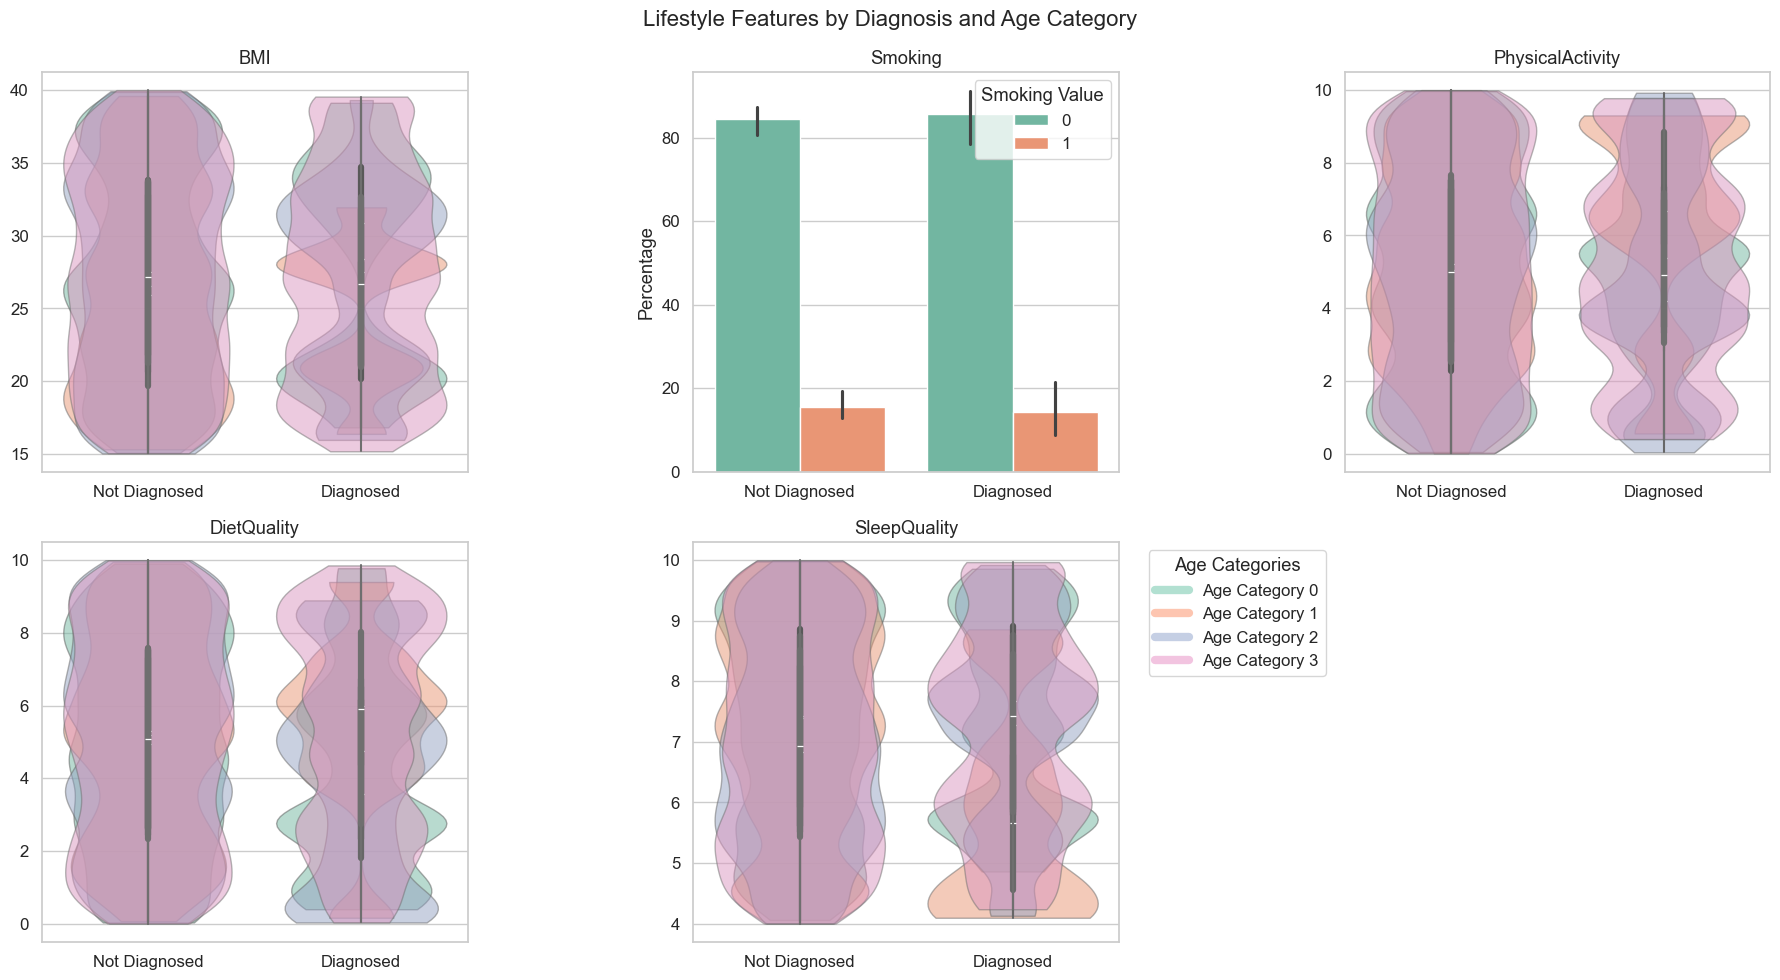

In [146]:
lifestyle_cols = ['BMI', 'Smoking', 'PhysicalActivity', 'DietQuality', 'SleepQuality']
age_categories = sorted(data['Age_Category'].unique())
palette = sns.color_palette("Set2", n_colors=len(age_categories))

plt.figure(figsize=(18, 10))

for idx, col in enumerate(lifestyle_cols):
    plt.subplot(2, 3, idx + 1)

    if col == 'Smoking':  # Handle binary feature differently
        all_bars = []

        for i, age_cat in enumerate(age_categories):
            subset = data[(data['Age_Category'] == age_cat) & (data['Diagnosis'].isin([0, 1]))]

            # Crosstab to get percentages
            ct = pd.crosstab(subset['Diagnosis'], subset[col], normalize='index') * 100
            ct = ct.reset_index().melt(id_vars='Diagnosis', var_name='Smoking Value', value_name='Percentage')
            ct['Age_Category'] = f'Age {age_cat}'
            all_bars.append(ct)

        bars_df = pd.concat(all_bars, ignore_index=True)

        # Use hue for both Smoking value and Age Category
        sns.barplot(
            data=bars_df,
            x='Diagnosis', y='Percentage',
            hue='Smoking Value',
            palette='Set2',
            dodge=True
        )

        plt.title('Smoking')
        plt.ylabel('Percentage')
        plt.xlabel('')
        plt.xticks([0, 1], ['Not Diagnosed', 'Diagnosed'])

    else:
        for i, age_cat in enumerate(age_categories):
            subset = data[data['Age_Category'] == age_cat]
            sns.violinplot(
                x='Diagnosis', y=col, data=subset,
                palette=[palette[i]],
                inner='box', linewidth=1,
                cut=0, bw=0.2,
                alpha=0.5
            )

        plt.xticks([0, 1], ['Not Diagnosed', 'Diagnosed'])
        plt.title(col)
        plt.xlabel('')
        plt.ylabel('')
        plt.legend([], [], frameon=False)

# Add legend for age categories (only once)
handles = [plt.Line2D([0], [0], color=palette[i], lw=6, alpha=0.5) for i in range(len(age_categories))]
labels = [f'Age Category {cat}' for cat in age_categories]
plt.legend(handles, labels, title='Age Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle('Lifestyle Features by Diagnosis and Age Category', fontsize=16)
plt.show()


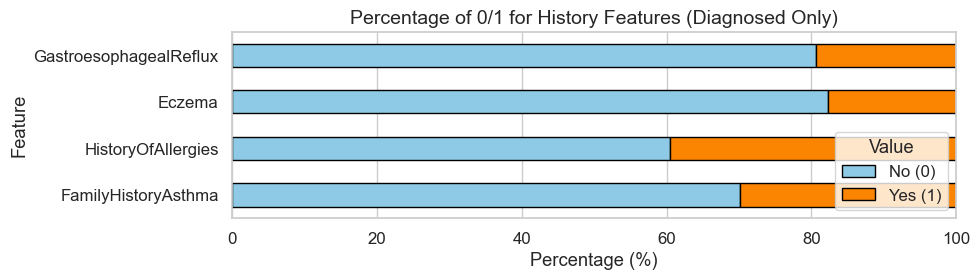

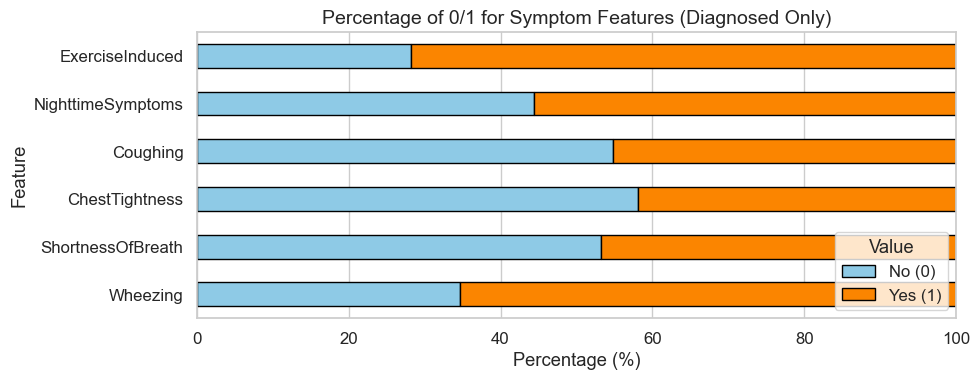

In [147]:
# Use only diagnosed data
data_diagnosed = data[data['Diagnosis'] == 1]

# Define binary columns
history_cols = ['FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'GastroesophagealReflux']
symptom_cols = ['Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced']

# Function to create stacked bar chart (0 vs 1) for each column
def plot_stacked_01(cols, title, n_rows):
    plot_data = []

    for col in cols:
        value_counts = data_diagnosed[col].value_counts(normalize=True).sort_index() * 100
        row = {
            'Feature': col,
            'No (0)': value_counts.get(0, 0),
            'Yes (1)': value_counts.get(1, 0)
        }
        plot_data.append(row)

    df_plot = pd.DataFrame(plot_data)
    df_plot.set_index('Feature', inplace=True)
    
    # Plot
    ax = df_plot.plot(kind='barh', stacked=True, figsize=(10, n_rows), color=['#8ecae6', '#fb8500'], edgecolor='black')
    plt.title(title, fontsize=14)
    plt.xlabel('Percentage (%)')
    plt.legend(title='Value', loc='lower right')
    plt.xlim(0, 100)
    plt.tight_layout()
    plt.show()

# Plot history features
plot_stacked_01(history_cols, 'Percentage of 0/1 for History Features (Diagnosed Only)', n_rows=3)

# Plot symptom features
plot_stacked_01(symptom_cols, 'Percentage of 0/1 for Symptom Features (Diagnosed Only)', n_rows=4)


/var/folders/0z/nh4zphkd0ljgxbl85xr8nlp00000gn/T/ipykernel_38053/1959328494.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[idx], palette='Blues')
/var/folders/0z/nh4zphkd0ljgxbl85xr8nlp00000gn/T/ipykernel_38053/1959328494.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[idx], palette='Blues')
/var/folders/0z/nh4zphkd0ljgxbl85xr8nlp00000gn/T/ipykernel_38053/1959328494.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_cou

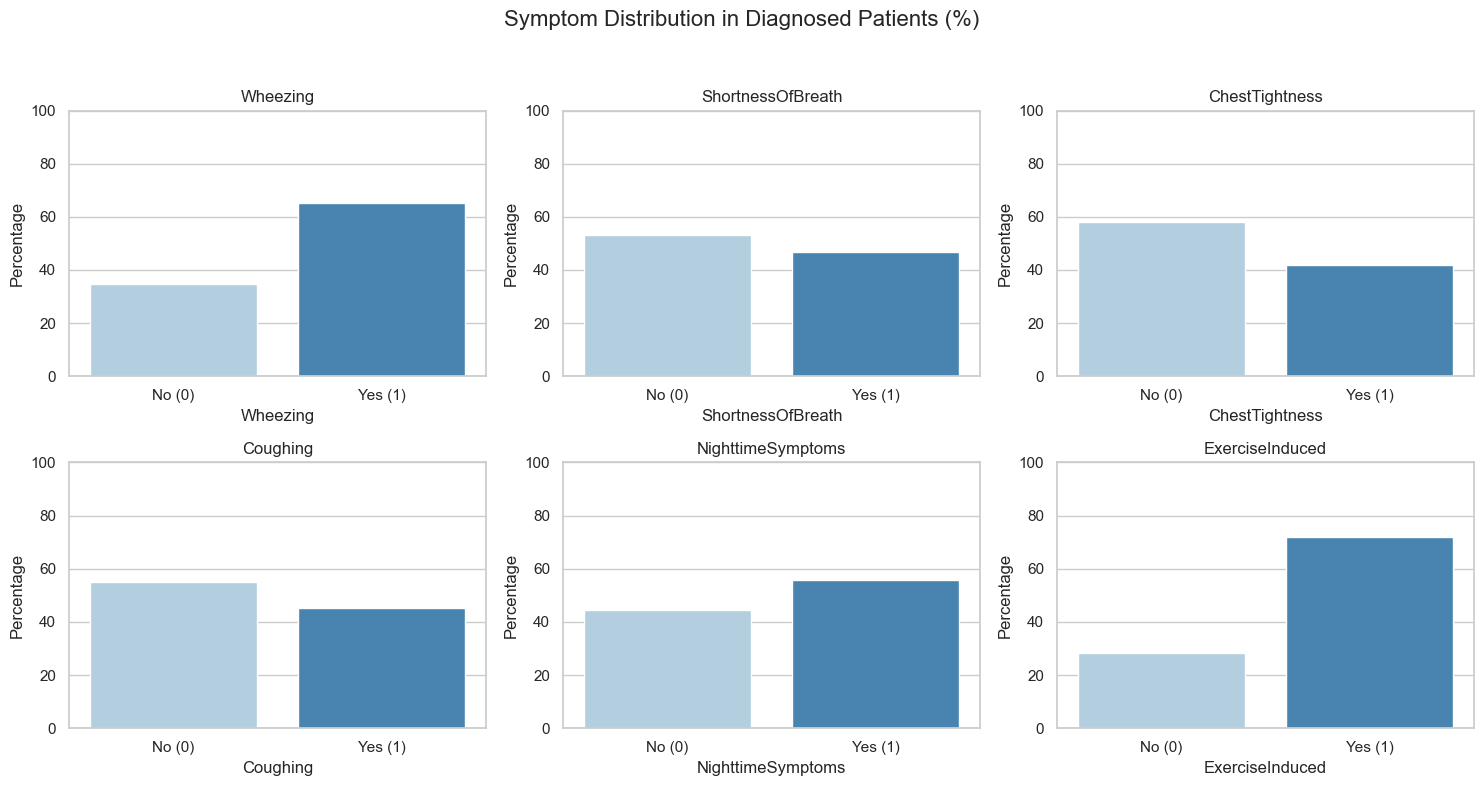

In [148]:
# Set consistent style
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

# Loop through each symptom and create a bar plot
for idx, col in enumerate(symptom_cols):
    value_counts = data_diagnosed[col].value_counts(normalize=True).sort_index() * 100
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[idx], palette='Blues')
    
    axes[idx].set_title(f'{col}')
    axes[idx].set_xticks([0, 1])
    axes[idx].set_xticklabels(['No (0)', 'Yes (1)'])
    axes[idx].set_ylabel('Percentage')
    axes[idx].set_ylim(0, 100)

# Adjust layout
plt.suptitle('Symptom Distribution in Diagnosed Patients (%)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


<Figure size 1200x600 with 0 Axes>

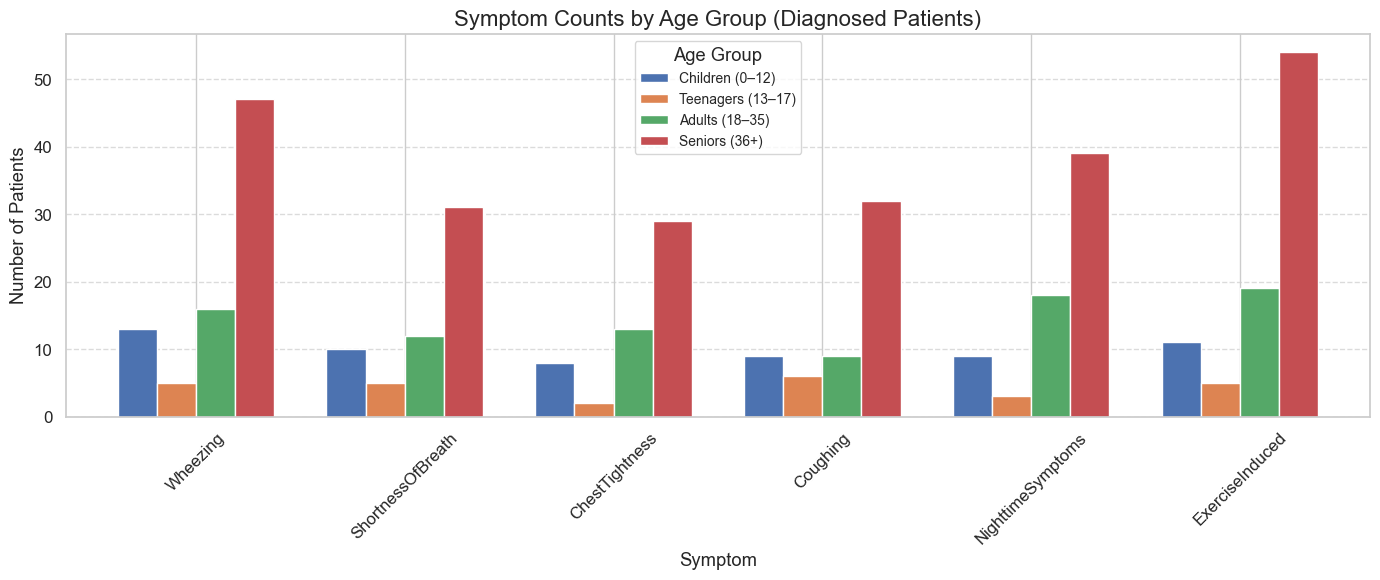

In [155]:
# Symptom columns
symptom_cols = [
    'Wheezing', 'ShortnessOfBreath', 'ChestTightness',
    'Coughing', 'NighttimeSymptoms', 'ExerciseInduced'
]

# Filter diagnosed data
data_diagnosed = data[data['Diagnosis'] == 1]

# Define readable age category labels
age_labels = {
    0: 'Children (0–12)',
    1: 'Teenagers (13–17)',
    2: 'Adults (18–35)',
    3: 'Seniors (36+)'
}

# Get unique age categories from diagnosed data
age_categories = sorted(data_diagnosed['Age_Category'].unique())

# Prepare DataFrame for symptom counts
summary_counts = pd.DataFrame(columns=symptom_cols)

for cat in age_categories:
    group = data_diagnosed[data_diagnosed['Age_Category'] == cat]
    counts = group[symptom_cols].sum()
    label = age_labels.get(cat, f'Age Category {cat}')
    summary_counts.loc[label] = counts

# Transpose for plotting
summary_counts = summary_counts.T

# Plotting
plt.figure(figsize=(12, 6))
summary_counts.plot(kind='bar', figsize=(14, 6), width=0.75)
plt.title('Symptom Counts by Age Group (Diagnosed Patients)', fontsize=16)
plt.ylabel('Number of Patients')
plt.xlabel('Symptom')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Age Group', fontsize=10)
plt.tight_layout()
plt.show()


In [158]:
print("Most common symptoms and significance tests by age category:\n")

for cat in sorted(data_diagnosed['Age_Category'].unique()):
    subset = data_diagnosed[data_diagnosed['Age_Category'] == cat]
    
    # Sum of symptom occurrences
    symptom_sums = subset[symptom_cols].sum()
    
    # Most common symptom by sum
    top_symptom = symptom_sums.idxmax()
    top_value = symptom_sums.max()
    
    print(f"🧑‍⚕️ In {age_labels.get(cat, f'Age Category {cat}')}, the most common symptom is **{top_symptom}** with total occurrences: {top_value}")
    
    # For statistical testing, use Wilcoxon signed-rank test (non-parametric) between top symptom and others
    for other in symptom_cols:
        if other == top_symptom:
            continue
        
        stat, p_value = wilcoxon(subset[top_symptom], subset[other])
        
        print(f"  vs {other:<20} ➜ statistic = {stat:.2f}, p = {p_value:.4f}", end=' ')
        if p_value < 0.05:
            print("✅ Significant difference")
        else:
            print("❌ Not significant")
    print()


Most common symptoms and significance tests by age category:

🧑‍⚕️ In Children (0–12), the most common symptom is **Wheezing** with total occurrences: 13
  vs ShortnessOfBreath    ➜ statistic = 8.00, p = 0.2568 ❌ Not significant
  vs ChestTightness       ➜ statistic = 4.00, p = 0.0588 ❌ Not significant
  vs Coughing             ➜ statistic = 9.00, p = 0.1573 ❌ Not significant
  vs NighttimeSymptoms    ➜ statistic = 9.00, p = 0.1573 ❌ Not significant
  vs ExerciseInduced      ➜ statistic = 7.00, p = 0.4142 ❌ Not significant

🧑‍⚕️ In Teenagers (13–17), the most common symptom is **Coughing** with total occurrences: 6
  vs Wheezing             ➜ statistic = 2.00, p = 1.0000 ❌ Not significant
  vs ShortnessOfBreath    ➜ statistic = 2.00, p = 1.0000 ❌ Not significant
  vs ChestTightness       ➜ statistic = 3.50, p = 0.2188 ❌ Not significant
  vs NighttimeSymptoms    ➜ statistic = 8.00, p = 0.4531 ❌ Not significant
  vs ExerciseInduced      ➜ statistic = 6.00, p = 1.0000 ❌ Not significant

🧑

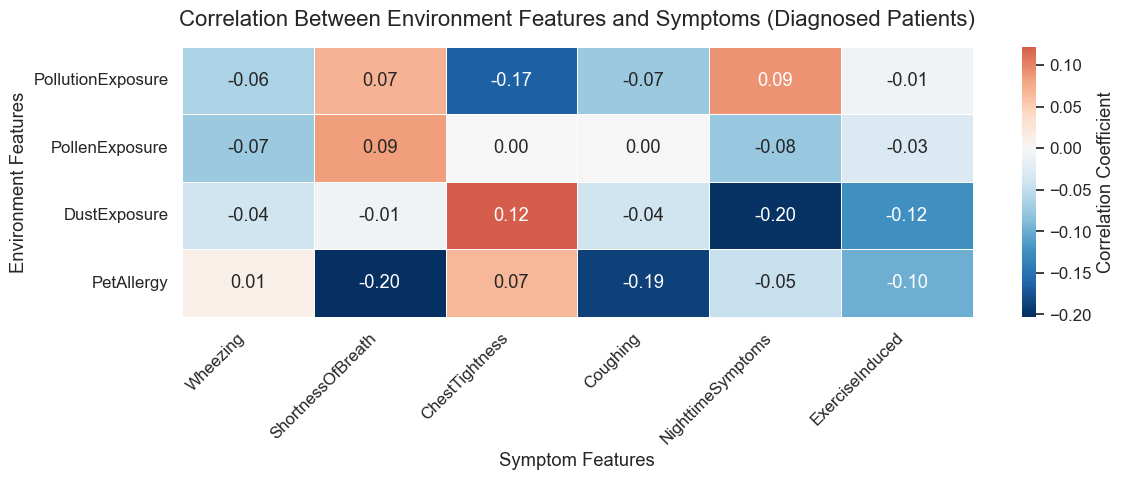

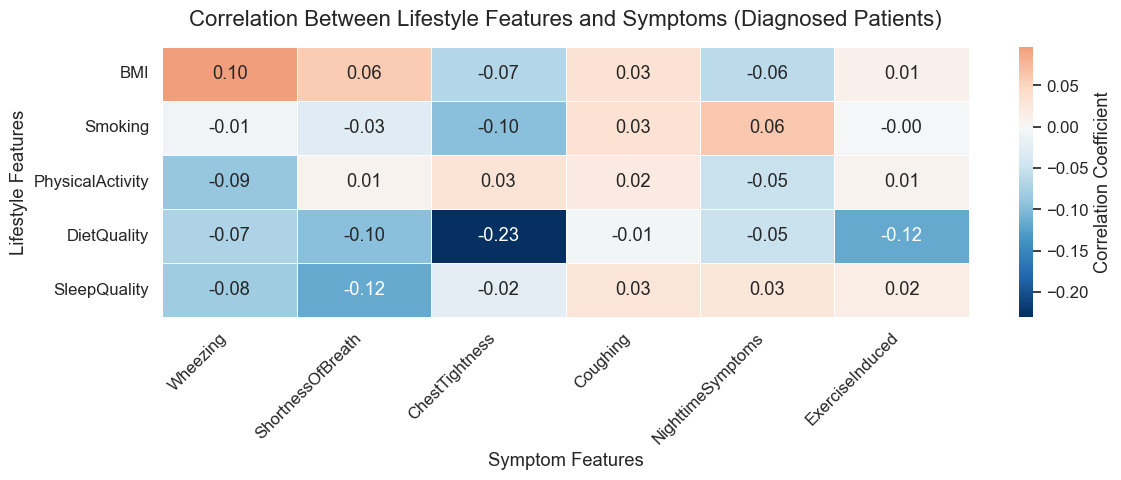

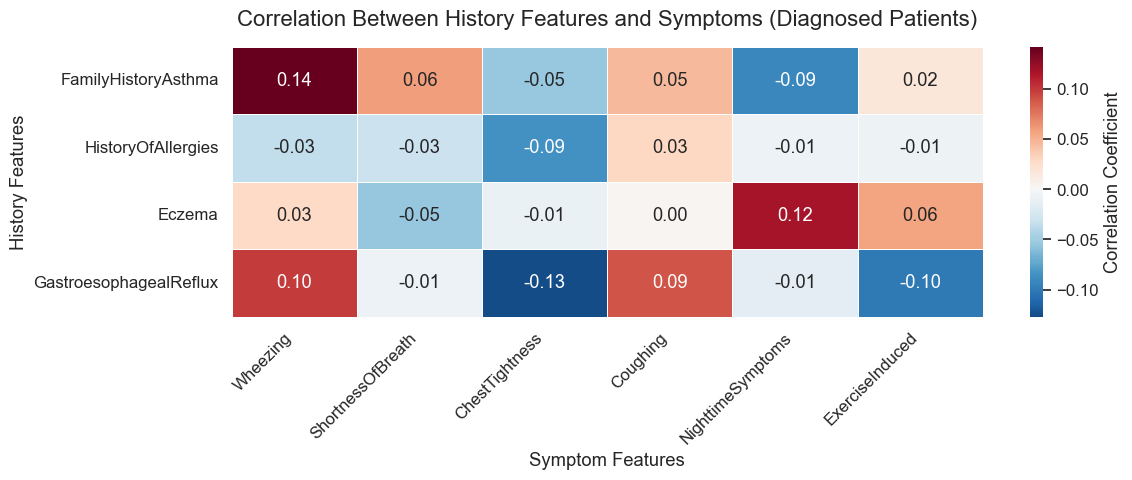

In [150]:

# History-related features
history_cols = ['FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'GastroesophagealReflux']

# Grouped feature dictionary
feature_groups = {
    "Environment": environment_cols,
    "Lifestyle": lifestyle_cols,
    "History": history_cols
}

# Set global styling
sns.set(style='whitegrid', font_scale=1.1)

# Loop through each group
for group_name, group_cols in feature_groups.items():
    # Compute correlation matrix
    corr = data_diagnosed[group_cols + symptom_cols].corr().loc[group_cols, symptom_cols]

    # Plot heatmap
    plt.figure(figsize=(12, 5 if len(group_cols) <= 5 else 6))
    sns.heatmap(
        corr,
        annot=True,
        fmt=".2f",
        cmap="RdBu_r",
        center=0,
        linewidths=0.5,
        cbar_kws={"label": "Correlation Coefficient"}
    )
    
    # Title and labels
    plt.title(
        f'Correlation Between {group_name} Features and Symptoms (Diagnosed Patients)',
        fontsize=16,
        pad=15
    )
    plt.xlabel("Symptom Features")
    plt.ylabel(f"{group_name} Features")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


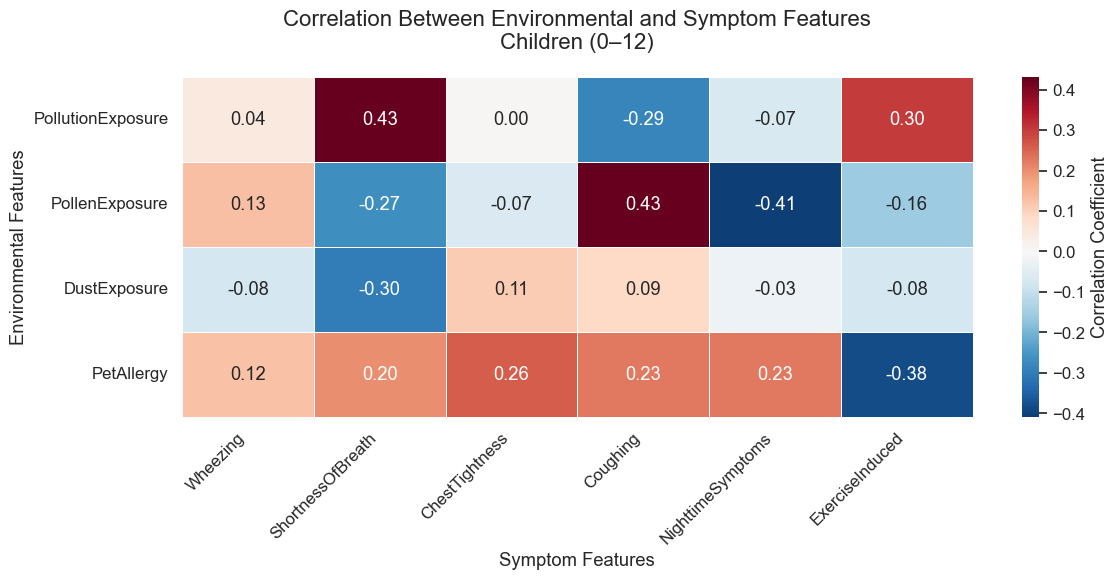

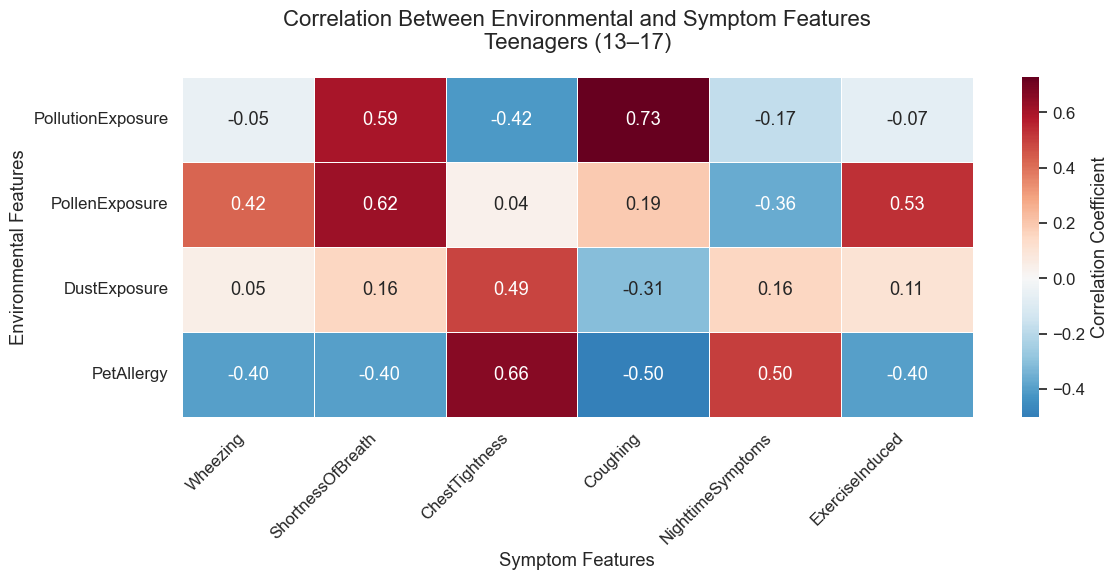

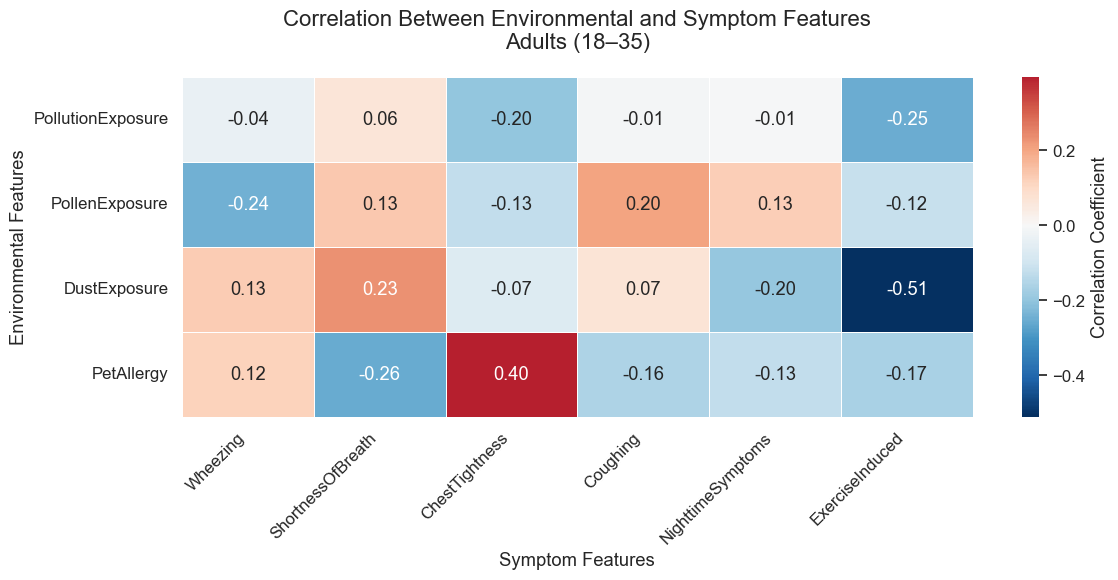

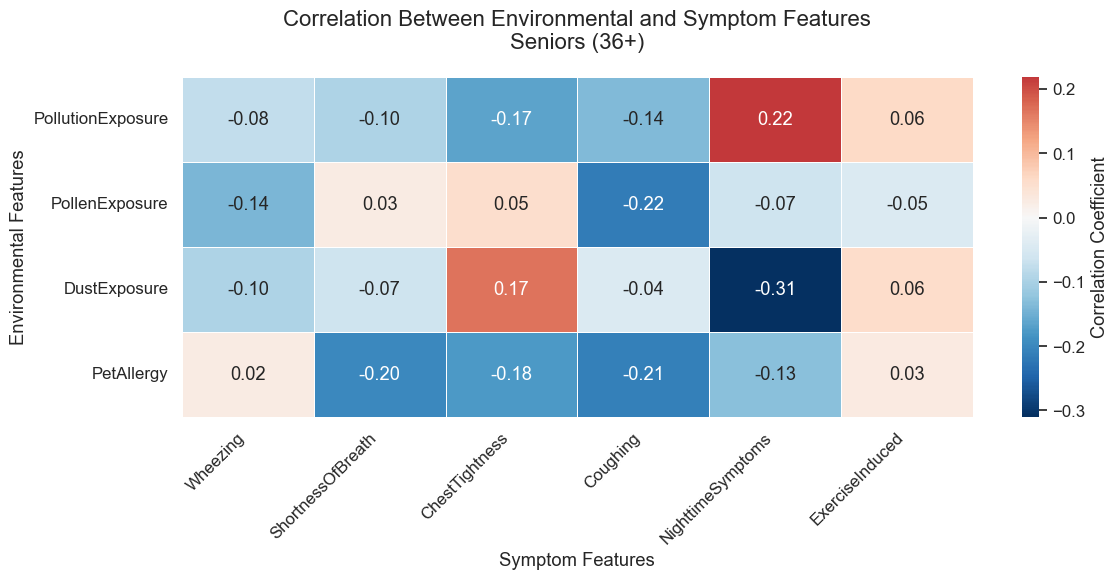

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age category labels
age_labels = {
    0: 'Children (0–12)',
    1: 'Teenagers (13–17)',
    2: 'Adults (18–35)',
    3: 'Seniors (36+)'
}

# Improved color palette and formatting
sns.set(style='whitegrid', font_scale=1.1)

# Loop through each age category in diagnosed data
for cat in sorted(data_diagnosed['Age_Category'].unique()):
    subset = data_diagnosed[data_diagnosed['Age_Category'] == cat]
    
    # Compute correlation matrix
    corr_matrix = subset[environment_cols + symptom_cols].corr().loc[environment_cols, symptom_cols]

    # Plot heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=".2f",
        cmap='RdBu_r',
        center=0,
        linewidths=0.5,
        cbar_kws={'label': 'Correlation Coefficient'}
    )
    
    plt.title(
        f'Correlation Between Environmental and Symptom Features\n{age_labels.get(cat, f"Age Category {cat}")}',
        fontsize=16,
        pad=20
    )
    plt.xlabel('Symptom Features')
    plt.ylabel('Environmental Features')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


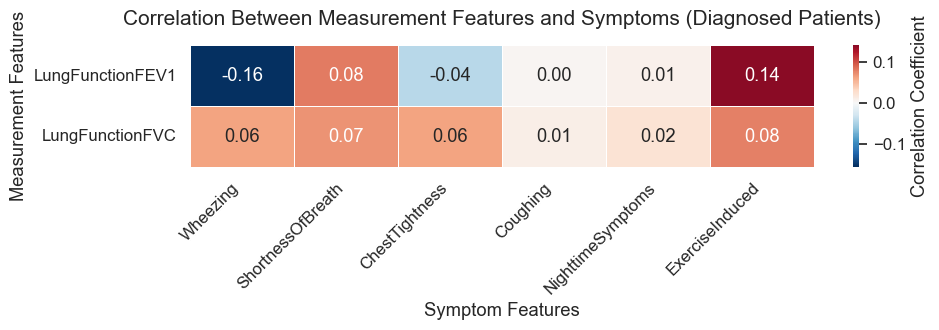

In [152]:
# --- Compute correlation matrix ---
corr_symptom_measurement = data_diagnosed[measurement_cols + symptom_cols].corr().loc[measurement_cols, symptom_cols]

# --- Plot heatmap ---
plt.figure(figsize=(10, 3.5))
sns.heatmap(
    corr_symptom_measurement,
    annot=True,
    fmt=".2f",
    cmap='RdBu_r',  # better contrast around 0
    center=0,
    linewidths=0.5,
    cbar_kws={"label": "Correlation Coefficient"}
)

# --- Titles and labels ---
plt.title('Correlation Between Measurement Features and Symptoms (Diagnosed Patients)', fontsize=15, pad=15)
plt.xlabel('Symptom Features')
plt.ylabel('Measurement Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [159]:
from scipy.stats import ttest_ind

# Filter data by diagnosis groups
group_diagnosed = data[data['Diagnosis'] == 1]['BMI']
group_not_diagnosed = data[data['Diagnosis'] == 0]['BMI']

# Run independent t-test
stat, p_value = ttest_ind(group_diagnosed, group_not_diagnosed)

print(f"T-test result for BMI difference:")
print(f"t-statistic = {stat:.3f}")
print(f"p-value = {p_value:.4f}")

if p_value < 0.05:
    print("=> Significant difference in BMI between diagnosed and not diagnosed groups.")
else:
    print("=> No significant difference in BMI between groups.")


T-test result for BMI difference:
t-statistic = -0.612
p-value = 0.5404
=> No significant difference in BMI between groups.
